# 05. Logisitic Regression (로지스틱 회귀)

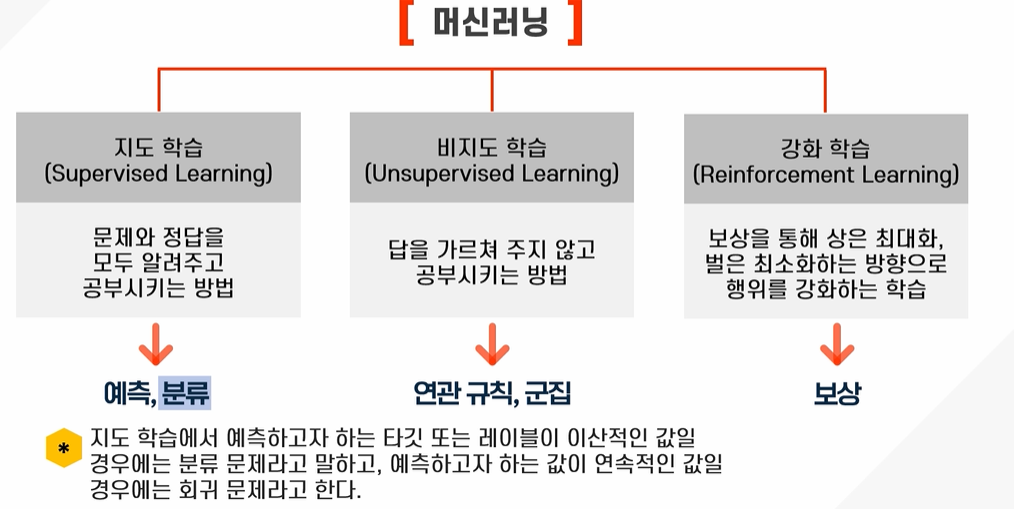

In [1]:
from IPython.display import Image
Image("img/img05_01.png", width=600)

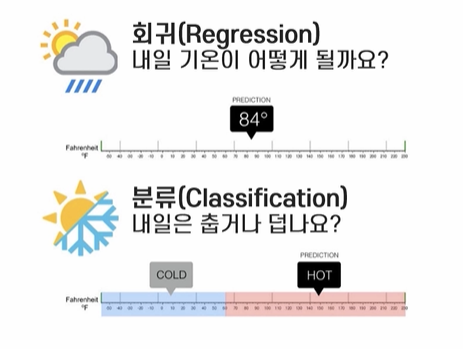

In [2]:
Image("img/img05_02.png", width=400)

## 주요개념

> - 로지스틱 회귀는 이진 분류 문제를 해결하기 위해서 사용되는 통계적 모델
> - 독립변수들의 선형 결합을 사용하여 종속 변수의 범주를 예측
> - 종속변수가 특정 클래스에 속할 활률을 모데링
> - 로지스틱 회귀는 선형 회귀와 달리 시그모이드 함수를 사용하여 예측값을 반환
> - 시그모이드 함수란 입력값을 0과 1 사이의 확률로 변환한다

In [3]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

###  타이타닉 데이터 수집

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- survived: 생존 여부를 나타내는 변수입니다. 1은 생존을, 0은 사망을 의미합니다.
- pclass: 승객의 사회 경제적 지위를 나타내는 변수입니다. 1은 1등석, 2는 2등석, 3은 3등석을 의미합니다.
- sex: 승객의 성별을 나타내는 변수입니다. 보통 0은 남성, 1은 여성을 의미합니다.
- age: 승객의 나이를 나타내는 변수입니다.
- sibsp: 함께 탑승한 형제자매 또는 배우자의 수를 나타내는 변수입니다.
- parch: 함께 탑승한 부모 또는 자녀의 수를 나타내는 변수입니다.
- fare: 승객이 지불한 운임을 나타내는 변수입니다.
- embarked: 승선한 항구를 나타내는 변수입니다. <br>보통 S는 사우샘프턴(Southampton), C는 셰르부르(Cherbourg), Q는 퀸스타운(Queenstown)을 의미합니다.
- alone: 승객이 혼자 탑승했는지 여부를 나타내는 변수입니다. 1은 혼자 탑승했음을, 0은 가족이나 동행인이 있었음을 의미합니다.

### 중복 데이터 제거

In [5]:
prep_data = titanic.drop(columns=['alive', 'who','adult_male', 'class', 'embark_town'])

# 결측치 때문에 제거
prep_data.drop("deck",axis=1, inplace=True )

prep_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True
887,1,1,female,19.0,0,0,30.0000,S,True
888,0,3,female,NaN,1,2,23.4500,S,False
889,1,1,male,26.0,0,0,30.0000,C,True


### 전체 데이터 확인

In [6]:
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [7]:
## 결측치 177개, 2개 존재 
# 0   survived  891 non-null    int64 
# 3   age       714 non-null    float64
# 7   embarked  889 non-null    object 

### 결측치 정리하자.

In [8]:
# embarked의 결측치는 na로 채우기
prep_data["embarked"] = prep_data.embarked.fillna("na")

# 나이의 결측치는 평균값으로 채우기
#prep_data["age"] = prep_data.age.transform(lambda x : x.fillna(x.mean()))
prep_data["age"] = prep_data.age.fillna( prep_data.age.mean())

prep_data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.000000,1,0,7.2500,S,False
1,1,1,female,38.000000,1,0,71.2833,C,False
2,1,3,female,26.000000,0,0,7.9250,S,True
3,1,1,female,35.000000,1,0,53.1000,S,False
4,0,3,male,35.000000,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,True
887,1,1,female,19.000000,0,0,30.0000,S,True
888,0,3,female,29.699118,1,2,23.4500,S,False
889,1,1,male,26.000000,0,0,30.0000,C,True


### 레이블인코딩 ( 값이 2개인 경우)

> - Flase을 0, True = 1
> - 알파벳순서 ( female = 0 ,  male =1 )

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
prep_data['sex'] = le.fit_transform(prep_data['sex'])
prep_data['alone'] = le.fit_transform(prep_data['alone'])
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.000000,1,0,7.2500,S,0
1,1,1,0,38.000000,1,0,71.2833,C,0
2,1,3,0,26.000000,0,0,7.9250,S,1
3,1,1,0,35.000000,1,0,53.1000,S,0
4,0,3,1,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,1
887,1,1,0,19.000000,0,0,30.0000,S,1
888,0,3,0,29.699118,1,2,23.4500,S,0
889,1,1,1,26.000000,0,0,30.0000,C,1


### 범주형 인코딩 ( pandas의 getdummies () 사용)

In [10]:
import pandas as pd

prep_data = pd.get_dummies(prep_data, prefix='', prefix_sep='').astype(int)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,C,Q,S,na
0,0,3,1,22,1,0,7,0,0,0,1,0
1,1,1,0,38,1,0,71,0,1,0,0,0
2,1,3,0,26,0,0,7,1,0,0,1,0
3,1,1,0,35,1,0,53,0,0,0,1,0
4,0,3,1,35,0,0,8,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,1,0,0,1,0
887,1,1,0,19,0,0,30,1,0,0,1,0
888,0,3,0,29,1,2,23,0,0,0,1,0
889,1,1,1,26,0,0,30,1,1,0,0,0


In [11]:
# ['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'] 가 존재하지 않으므로 
# 특성과 타켓 변수를 분리할 수 없다.
prep_data.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'C', 'Q', 'S', 'na'],
      dtype='object')

#### 특성과 레이블 분리
> -  x = prep_data.iloc[:, 1:]  # 모든 행과 첫번째 열을 제외한 나머지 열 선택 
> -  y = prep_data.iloc[:, 0]  # 모든 행과 첫번째 열 선택 
> -  훈련세트와 테스트세트로 분리
> -  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

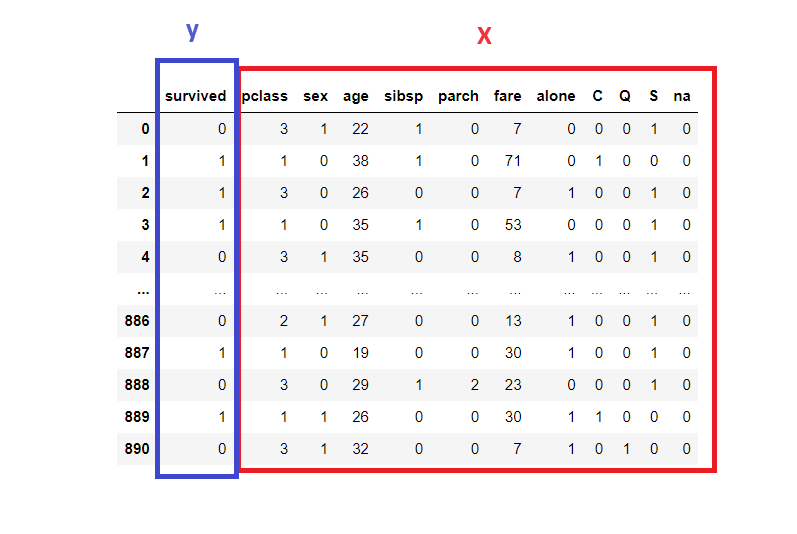

In [12]:
Image("img/img05_03.png", width=400)

In [13]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split( prep_data.iloc[:, 1:],prep_data.iloc[:, 0] , test_size=0.2, random_state=42)

### 스케일링 작업

> - 스케일링 작업이란 데이터 전처리 과정에서 각 특징(feature)의 값을 일정한 범위로 변환하는 작업
> - 머신러닝 모델에 데이터를 입력하기 전에 스케일링을 하는 이유는 모델의 성능을 향상시키고 학습을 안정적으로 하기 위함
> - 주요목적 : 모델의 성능 향상:학습 속도 향상:정규화된 범위로 변환:
> - 방법 ; 최소-최대 스케일링 (Min-Max Scaling), 표준화 (Standardization), Robust 스케일링 (Robust Scaling), 정규화 스케일링

In [14]:
from sklearn.preprocessing import RobustScaler

# RobustScaler : 중간값과 사분위수를 이용해서 데이터의 스케일 조정
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 교차검증 없이 로지스틱 사용

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)

# 생존 확률 예측
Y_pred = clf.predict(X_test)

clf.score(X_test, Y_test)

0.8044692737430168

### 시각화

### 1) 좌석 등급과 생존률 시각화

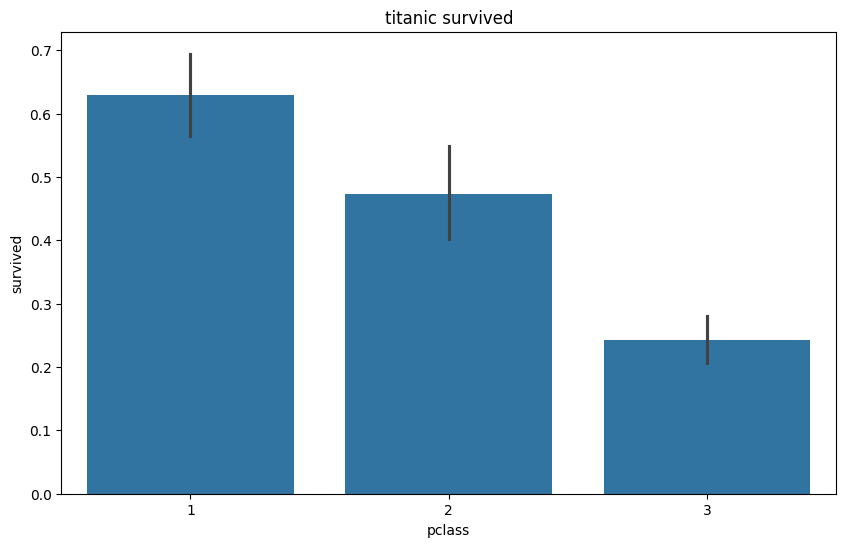

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측 결과 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.xlabel('pclass')
plt.ylabel('survived')
plt.title('titanic survived')
plt.show()

### 혼동 행렬 생성 및 시각화

> - 분류 문제 에서 모델의 성능을 평가하기 위해서 사용되는 도구
> - 예측된 클래스와 실제 클래스를 비교하여 분류 모델이 얼마나 잘 작동하는지 시각적으로 표현

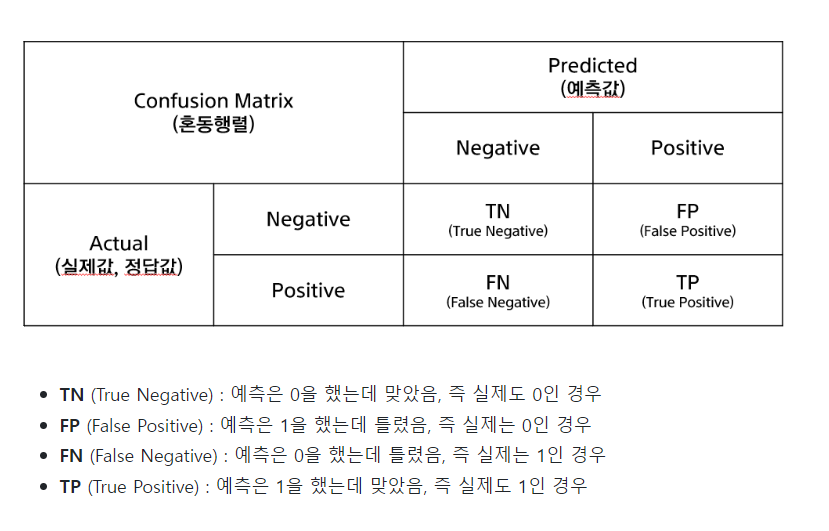

In [17]:
Image("img/img05_04.png")

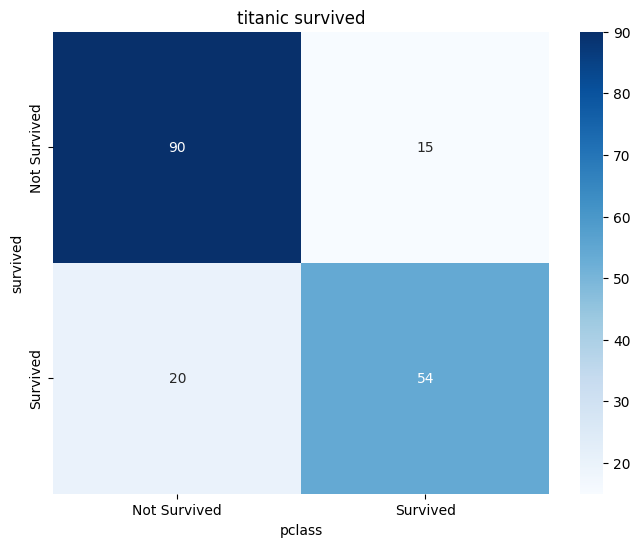

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('pclass')
plt.ylabel('survived')
plt.title('titanic survived')
plt.show()